In [1]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [3]:
# Load in the data

df = pd.read_csv('Spotify_Christmas_Streams.csv')

In [5]:
# Clean datetimes

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [7]:
# Create a subset for modeling

song = "All I Want for Christmas Is You"
song_df = df[df['track'] == song].copy()

In [9]:
# Create a full week calendar

full_weeks = pd.date_range(
    start=song_df['date'].min(),
    end='2026-12-31',
    freq='W-THU'  # matches Kworb weekly release
)

full_df = pd.DataFrame({'ds': full_weeks})


In [11]:
# Create dummy values of 0 streams, where there are none

prophet_df = (
    full_df
    .merge(
        song_df[['date', 'streams']],
        left_on='ds',
        right_on='date',
        how='left'
    )
    .drop(columns='date')
)

prophet_df['y'] = prophet_df['streams'].fillna(0)
prophet_df = prophet_df[['ds', 'y']]


In [13]:
# Add the seasonality effect of Christmas

christmas = pd.DataFrame({
    'holiday': 'christmas',
    'ds': pd.to_datetime([
        '2017-12-25','2018-12-25','2019-12-25','2020-12-25',
        '2021-12-25','2022-12-25','2023-12-25','2024-12-25',
        '2025-12-25','2026-12-25'
    ]),
    'lower_window': -14,
    'upper_window': 7
})


In [15]:
# Fit the prophet model

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=christmas,
    seasonality_mode='multiplicative'
)

model.fit(prophet_df)


12:38:25 - cmdstanpy - INFO - Chain [1] start processing
12:38:26 - cmdstanpy - INFO - Chain [1] done processing


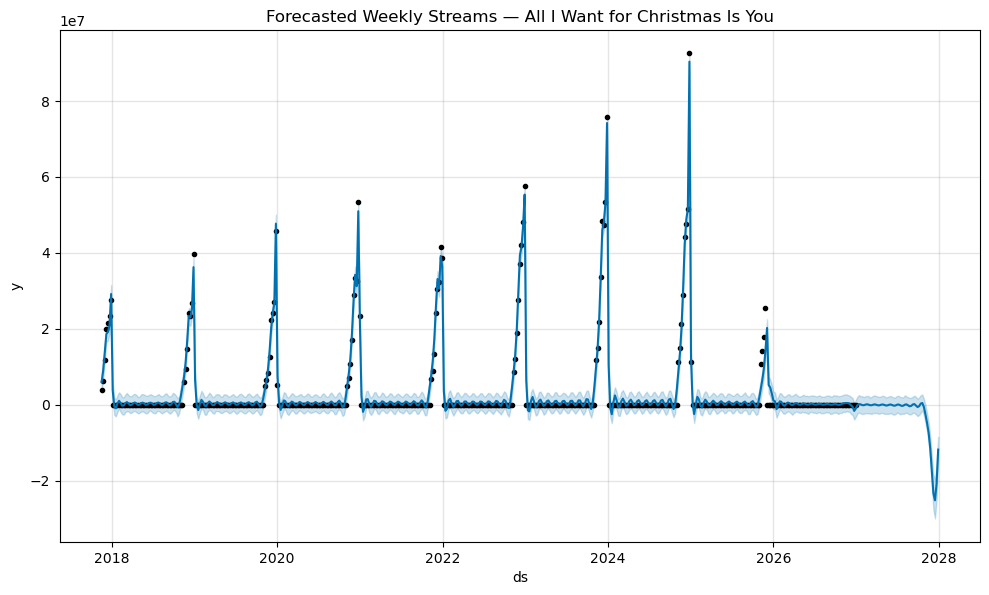

In [17]:
# Forecasting for 2026

future = model.make_future_dataframe(
    periods=52,
    freq='W-THU'
)

forecast = model.predict(future)

model.plot(forecast)
plt.title(f"Forecasted Weekly Streams — {song}")
plt.show()

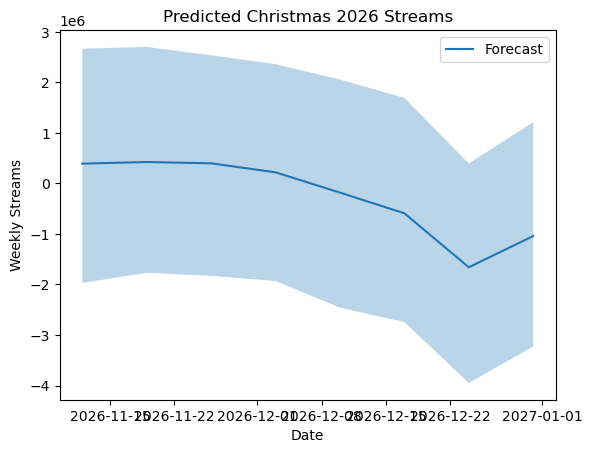

In [19]:
# Zoomed in Forecast

forecast_2026 = forecast[
    (forecast['ds'].dt.year == 2026) &
    (forecast['ds'].dt.isocalendar().week >= 46)
]

plt.figure()
plt.plot(forecast_2026['ds'], forecast_2026['yhat'], label='Forecast')
plt.fill_between(
    forecast_2026['ds'],
    forecast_2026['yhat_lower'],
    forecast_2026['yhat_upper'],
    alpha=0.3
)
plt.title("Predicted Christmas 2026 Streams")
plt.xlabel("Date")
plt.ylabel("Weekly Streams")
plt.legend()
plt.show()

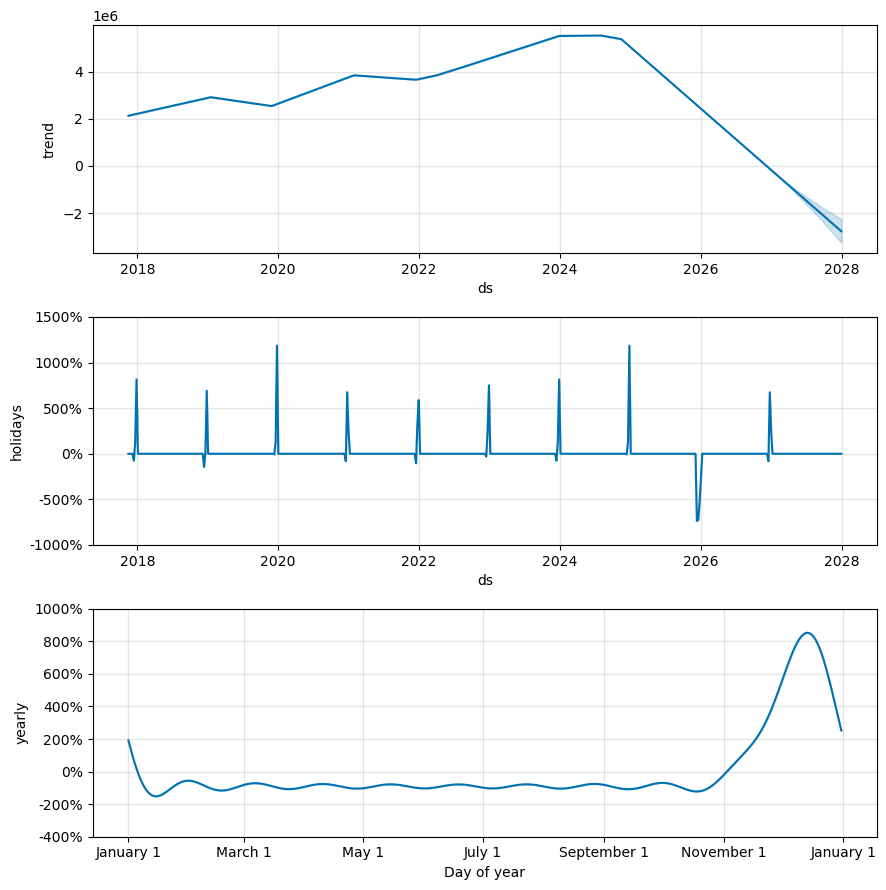

In [21]:
# Prophet components

model.plot_components(forecast)
plt.show()

In [23]:
# Refine and Adjust the Prophet model

# Aleviates negative predictions
prophet_df['floor'] = 0

# New models with additive instead of multiplicative
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=christmas,
    seasonality_mode='additive',
    changepoint_prior_scale=0.05  # smaller = smoother trend
)

model.fit(prophet_df)

12:38:44 - cmdstanpy - INFO - Chain [1] start processing
12:38:44 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
# Limit forecast horizon

future = model.make_future_dataframe(
    periods=20,  # just enough to reach Christmas 2026
    freq='W-THU'
)

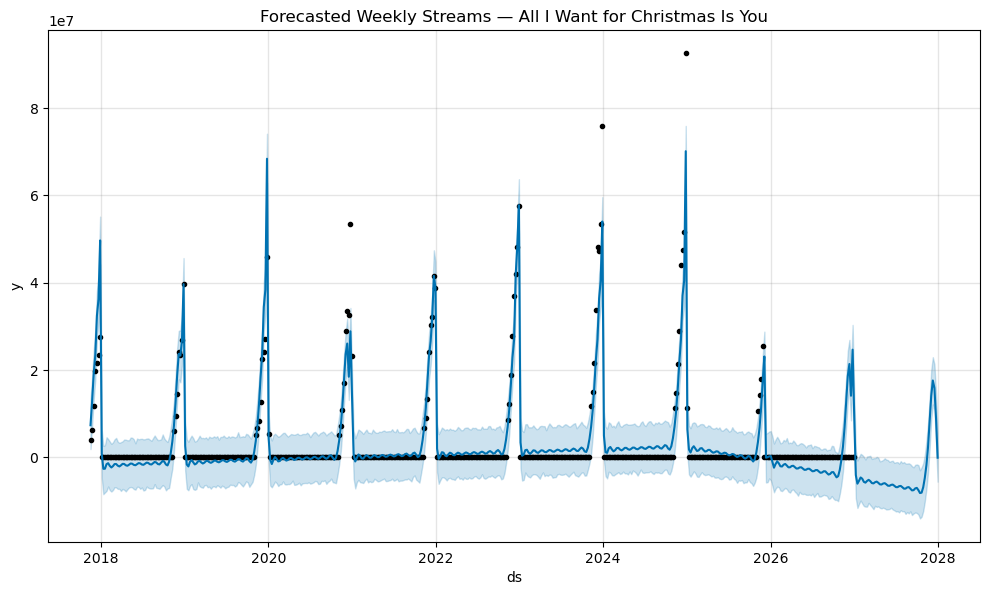

In [27]:
# Forecasting for 2026

future = model.make_future_dataframe(
    periods=52,
    freq='W-THU'
)

forecast = model.predict(future)

model.plot(forecast)
plt.title(f"Forecasted Weekly Streams — {song}")
plt.show()

In [29]:
# Further analysis
# Create a subset for modeling

song = "Last Christmas"
song_df = df[df['track'] == song].copy()

In [31]:
# Create a full week calendar

full_weeks = pd.date_range(
    start=song_df['date'].min(),
    end='2026-12-31',
    freq='W-THU'  # matches Kworb weekly release
)

full_df = pd.DataFrame({'ds': full_weeks})

In [33]:
# Create dummy values of 0 streams, where there are none

prophet_df = (
    full_df
    .merge(
        song_df[['date', 'streams']],
        left_on='ds',
        right_on='date',
        how='left'
    )
    .drop(columns='date')
)

prophet_df['y'] = prophet_df['streams'].fillna(0)
prophet_df = prophet_df[['ds', 'y']]

In [35]:
# Add the seasonality effect of Christmas

christmas = pd.DataFrame({
    'holiday': 'christmas',
    'ds': pd.to_datetime([
        '2017-12-25','2018-12-25','2019-12-25','2020-12-25',
        '2021-12-25','2022-12-25','2023-12-25','2024-12-25',
        '2025-12-25','2026-12-25'
    ]),
    'lower_window': -14,
    'upper_window': 7
})

In [37]:
# Fit the model
# Aleviates negative predictions
prophet_df['floor'] = 0

# New models with additive instead of multiplicative
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=christmas,
    seasonality_mode='additive',
    changepoint_prior_scale=0.05  # smaller = smoother trend
)

model.fit(prophet_df)

12:39:02 - cmdstanpy - INFO - Chain [1] start processing
12:39:02 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
# Limit forecast horizon

future = model.make_future_dataframe(
    periods=20,  # just enough to reach Christmas 2026
    freq='W-THU'
)

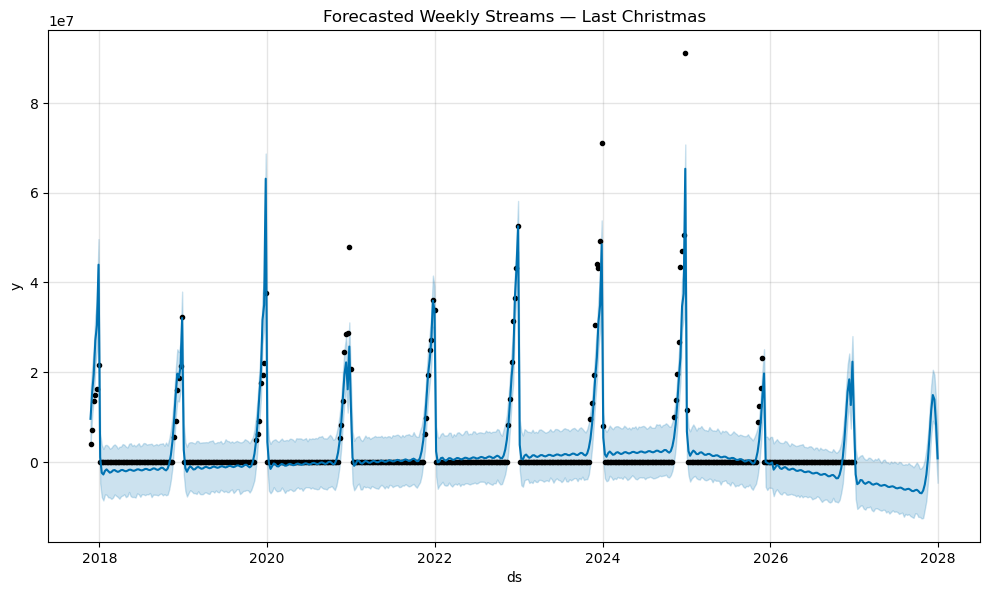

In [61]:
# Forecasting for 2026

future = model.make_future_dataframe(
    periods=52,
    freq='W-THU'
)

forecast = model.predict(future)

model.plot(forecast)
plt.title(f"Forecasted Weekly Streams — {song}")
plt.show()